### Generating Benchmark Data

In [1]:
from Vector_benchmarking.generate_polys import generate_voronoi_plot


In [2]:
# #Ignore warning message about CRS mismatch (does not affect data generation)
import warnings
warnings.filterwarnings('ignore')
import os
os.makedirs(".\Vector_benchmarking\data", exist_ok=True)

# #Generating random vector polygons as benchmark data
n_points=75
count=1000

for i in range(0, count):
    shapes = generate_voronoi_plot(n_points)
    shapes.to_file(f'.\Vector_benchmarking\data\Vector_{i+1:03}.gpkg')

# Running DGGS Benchmark

In [3]:
from Vector_benchmarking.DGGS_funcs import benchmark_gpkg_files, load_and_prepare_data, define_classes, apply_classifications, benchmark_classification, final_processing_and_plotting
from itertools import product
from pathlib import Path

### Indexing and Joining

In [4]:
input_dir = Path('.\Vector_benchmarking\data')
output_dir = Path.cwd()
num_files_to_open = 15 #Change to desired input number
benchmark_runs = 5 #Change to desired benchmark runs
h3_res = 14 #Change to desired h3 resolution

In [5]:
benchmark_gpkg_files(input_dir, output_dir, num_files_to_open, benchmark_runs, h3_res=14)

Run: index time - 4.3299620151519775 seconds, joining time - 1.0953965187072754 seconds, Total time- 5.769097805023193 seconds
Run: index time - 4.337338209152222 seconds, joining time - 1.0496199131011963 seconds, Total time- 5.711737155914307 seconds
Run: index time - 4.345468759536743 seconds, joining time - 1.0641701221466064 seconds, Total time- 5.724908113479614 seconds
Run: index time - 4.115731716156006 seconds, joining time - 0.9917323589324951 seconds, Total time- 5.419018745422363 seconds
Run: index time - 4.181787729263306 seconds, joining time - 1.0293920040130615 seconds, Total time- 5.501093149185181 seconds


### Classifying

Classifying pre-preparation

In [6]:
# Load and process files
combined_df = load_and_prepare_data(input_dir, num_files_to_open, h3_res)
# Define classification functions
classes = define_classes()
# Apply classifications
combined_df = apply_classifications(combined_df, classes)

#### Classification Benchmark

In [7]:
# Benchmark classification
benchmark_classification(combined_df, benchmark_runs)

Run: Time taken - 0.8451786041259766 seconds
Run: Time taken - 0.7709188461303711 seconds
Run: Time taken - 0.8607964515686035 seconds
Run: Time taken - 0.7975273132324219 seconds
Run: Time taken - 0.8096499443054199 seconds


### Plotting

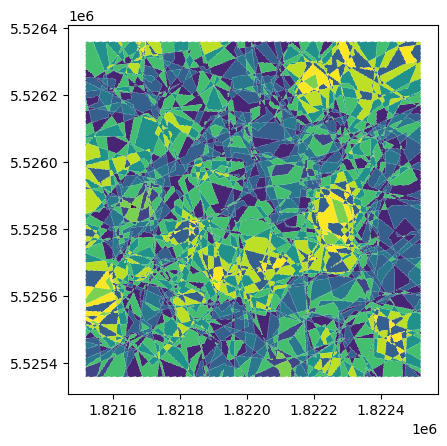

In [8]:
# Create class mapping
combinations = list(product([0, 1], repeat=len(combined_df.columns)))
class_mapping = {tuple(row): f'Class_{i+1:03}' for i, row in enumerate(combinations)}
# Final processing and plotting
final_processing_and_plotting(combined_df, class_mapping)

# Running Vector Benchmarks

In [9]:
from Vector_benchmarking.Vector_funcs import benchmark_vector_join, load_and_prepare_vectors, define_classes, apply_classification_vector, benchmark_classification_vector, final_processing_and_plotting_v

### Joining

In [10]:
benchmark_vector_join(input_dir, output_dir, num_files_to_open, benchmark_runs)

Run: joining time - 1.81 seconds, Total time - 2.03 seconds
Run: joining time - 1.78 seconds, Total time - 2.01 seconds
Run: joining time - 1.83 seconds, Total time - 2.07 seconds
Run: joining time - 1.88 seconds, Total time - 2.14 seconds
Run: joining time - 1.91 seconds, Total time - 2.15 seconds


### Classifying

#### Classifying pre-preparation

In [11]:
# Load and process files
combined_vdf = load_and_prepare_vectors(input_dir, num_files_to_open)
# Define classification functions
classes = define_classes()
# Apply classifications
combined_vdf = apply_classification_vector(combined_vdf, classes)

#### Classification Benchmark

In [12]:
# Benchmark classification
benchmark_classification_vector(combined_vdf, benchmark_runs)

Run: Time taken - 0.1508619785308838 seconds
Run: Time taken - 0.13666796684265137 seconds
Run: Time taken - 0.16866159439086914 seconds
Run: Time taken - 0.1528177261352539 seconds
Run: Time taken - 0.15049147605895996 seconds


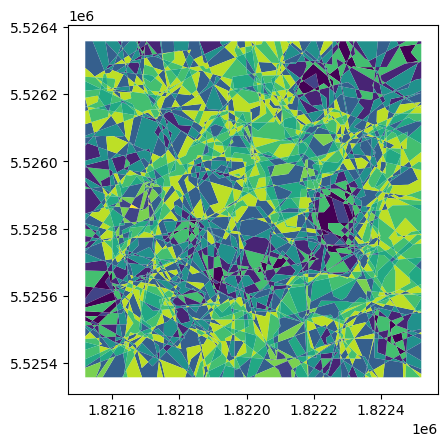

In [13]:
# Create class mapping
combinations = list(product([True, False], repeat=7))
class_mapping = {tuple(row): f'Class_{i+1:03}' for i, row in enumerate(combinations)}
# Final processing and plotting
final_processing_and_plotting_v(combined_vdf, class_mapping)